In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
downsample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Trimester 3/downsample_df.csv')

In [4]:

# List of SYNOP codes
synop_codes = [0, 3, 4, 5, 6, 7, 8]

# Dictionary to hold smaller datasets
small_datasets = {}

# Loop through each SYNOP code and create a small dataset
for code in synop_codes:
    # Filter the dataset for the current SYNOP code
    small_datasets[code] = downsample_data[downsample_data['SYNOPCode'] == code]

    # Print the size of each small dataset for verification
    print(f"SYNOP Code: {code} - Dataset shape: {small_datasets[code].shape}")

SYNOP Code: 0 - Dataset shape: (7707, 27)
SYNOP Code: 3 - Dataset shape: (191, 27)
SYNOP Code: 4 - Dataset shape: (466, 27)
SYNOP Code: 5 - Dataset shape: (3769, 27)
SYNOP Code: 6 - Dataset shape: (5078, 27)
SYNOP Code: 7 - Dataset shape: (419, 27)
SYNOP Code: 8 - Dataset shape: (1508, 27)


Model 1: Group FSO Random Forest Regressor Model

In [5]:
# Initialize a list to store the combined results
comb_result1 = []

# Iterate over each SYNOP code
for code, data in small_datasets.items():
    # Prepare data
    X = data.drop(columns=['FSO_Att', 'RFL_Att', 'SYNOPCode'])
    y_fso = data['FSO_Att']

    # Split the data
    X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.25, random_state=42)

    # Initialize Random Forest Regressor with OOB score enabled
    rf_fso = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True, bootstrap=True)
    # Store results
    results = []
    print(f"SYNOPCode: {code}")
    for num_features in range(X.shape[1], 0, -1):
      # Train the model
      rf_fso.fit(X_train_fso, y_train_fso)
      y_pred_fso = rf_fso.predict(X_test_fso)

      # Calculate RMSE and R2
      rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
      r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
      oob_score_fso = round(rf_fso.oob_score_, 2)

      # Store the performance metrics
      results.append((num_features, rmse_fso, r2_fso, oob_score_fso))

      # Feature Importance
      importances_fso = rf_fso.feature_importances_
      indices_fso = np.argsort(importances_fso)[::-1]

      # Remove the least important feature
      least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
      print(f"Removing least important feature: {least_important_feature_fso}")
      X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
      X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    optimal_rmse = results_df['RMSE'].min()
    optimal_r2 = results_df.loc[results_df['RMSE'].idxmin()]['R2']

    # Display the results
    print("Performance metrics after each feature removal:")
    print(results_df)

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    print(f"The optimal number of features is: {optimal_features}")

    # Append the result to comb_result1
    comb_result1.append({
        'SYNOPCode': code,
        'Optimal_Features': optimal_features,
        'Optimal_RMSE': optimal_rmse,
        'Optimal_R2': optimal_r2
    })

# Convert the results list to a DataFrame
comb_results_df1 = pd.DataFrame(comb_result1)


SYNOPCode: 0
Removing least important feature: RainIntensityMax
Removing least important feature: RainIntensityMin
Removing least important feature: RainIntensity
Removing least important feature: Frequency
Removing least important feature: Particulate
Removing least important feature: ParticulateMax
Removing least important feature: WindDirection
Removing least important feature: WindSpeed
Removing least important feature: ParticulateMin
Removing least important feature: WindSpeedMax
Removing least important feature: RelativeHumidity
Removing least important feature: WindSpeedMin
Removing least important feature: Time
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: TemperatureDifference
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: TemperatureMin
Removing least important feature: TemperatureMax
Removing least important feature: VisibilityMax
Removing least important feature: AbsoluteHumidity
Removing lea

Model 2:  Group FSO Extra Trees Regressor Model

In [6]:
# Initialize a list to store the combined results
comb_result2 = []
# Iterate over each SYNOP code
for code, data in small_datasets.items():
    # Prepare data
    X = data.drop(columns=['FSO_Att', 'RFL_Att', 'SYNOPCode'])
    y_fso = data['FSO_Att']

    # Split the data
    X_train_fso, X_test_fso, y_train_fso, y_test_fso = train_test_split(X, y_fso, test_size=0.25, random_state=42)

    # Initialize Extra Tree  Regressor with OOB score enabled
    et_fso = ExtraTreesRegressor(n_estimators=100, random_state=42, oob_score=True, bootstrap=True)
    # Store results
    results = []
    print(f"SYNOPCode: {code}")
    for num_features in range(X.shape[1], 0, -1):
      # Train the model
      et_fso.fit(X_train_fso, y_train_fso)
      y_pred_fso = et_fso.predict(X_test_fso)

      # Calculate RMSE and R2
      rmse_fso = round(np.sqrt(mean_squared_error(y_test_fso, y_pred_fso)), 2)
      r2_fso = round(r2_score(y_test_fso, y_pred_fso), 2)
      oob_score_fso = round(et_fso.oob_score_, 2)

      # Store the performance metrics
      results.append((num_features, rmse_fso, r2_fso, oob_score_fso))

      # Feature Importance
      importances_fso = et_fso.feature_importances_
      indices_fso = np.argsort(importances_fso)[::-1]

      # Remove the least important feature
      least_important_feature_fso = X_train_fso.columns[indices_fso[-1]]
      print(f"Removing least important feature: {least_important_feature_fso}")
      X_train_fso = X_train_fso.drop(columns=[least_important_feature_fso])
      X_test_fso = X_test_fso.drop(columns=[least_important_feature_fso])

    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results, columns=['Num_Features', 'RMSE', 'R2', 'OOB_Score'])

    # Display the results
    print("Performance metrics after each feature removal:")
    print(results_df)

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    optimal_rmse = results_df['RMSE'].min()
    optimal_r2 = results_df.loc[results_df['RMSE'].idxmin()]['R2']

    # Find the number of features that gives the best RMSE
    optimal_features = results_df.loc[results_df['RMSE'].idxmin()]['Num_Features']
    print(f"The optimal number of features is: {optimal_features}")


    # Append the result to comb_result2
    comb_result2.append({
        'SYNOPCode': code,
        'Optimal_Features': optimal_features,
        'Optimal_RMSE': optimal_rmse,
        'Optimal_R2': optimal_r2
    })

# Convert the results list to a DataFrame
comb_results_df2 = pd.DataFrame(comb_result2)


SYNOPCode: 0
Removing least important feature: RainIntensity
Removing least important feature: RainIntensityMin
Removing least important feature: RainIntensityMax
Removing least important feature: ParticulateMin
Removing least important feature: Frequency
Removing least important feature: Particulate
Removing least important feature: WindDirection
Removing least important feature: ParticulateMax
Removing least important feature: WindSpeed
Removing least important feature: WindSpeedMin
Removing least important feature: RelativeHumidity
Removing least important feature: WindSpeedMax
Removing least important feature: TemperatureDifference
Removing least important feature: Time
Removing least important feature: AbsoluteHumidityMin
Removing least important feature: TemperatureMax
Removing least important feature: AbsoluteHumidityMax
Removing least important feature: TemperatureMin
Removing least important feature: VisibilityMax
Removing least important feature: AbsoluteHumidity
Removing lea

PLOTS

In [7]:
# Display the final DataFrame
print("Random Forest Regressor")
print(comb_results_df1)
print("Extra Trees Regressor")
print(comb_results_df2)

Random Forest Regressor
   SYNOPCode  Optimal_Features  Optimal_RMSE  Optimal_R2
0          0              17.0          1.18        0.92
1          3               9.0          1.80        0.96
2          4              16.0          0.62        0.97
3          5              18.0          1.09        0.91
4          6              20.0          1.37        0.91
5          7              17.0          0.86        0.98
6          8              16.0          0.93        0.94
Extra Trees Regressor
   SYNOPCode  Optimal_Features  Optimal_RMSE  Optimal_R2
0          0              18.0          1.15        0.92
1          3              12.0          1.33        0.98
2          4              12.0          0.50        0.98
3          5              24.0          1.05        0.91
4          6              22.0          1.29        0.92
5          7              15.0          0.75        0.98
6          8              20.0          0.88        0.94


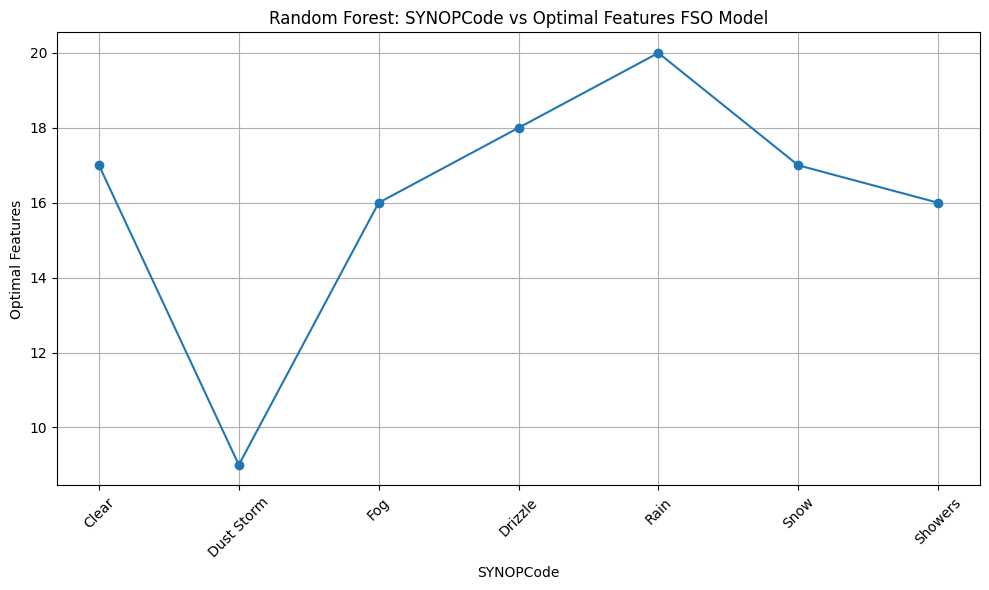

In [9]:
# Define weather descriptions for SYNOPCodes
weather_descriptions = {
    0: "Clear",
    3: "Dust Storm",
    4: "Fog",
    5: "Drizzle",
    6: "Rain",
    7: "Snow",
      8: "Showers"
  }

# Replace SYNOPCode with descriptions for plotting
comb_results_df1['Weather'] = comb_results_df1['SYNOPCode'].map(weather_descriptions)
# Plotting SYNOPCode vs Optimal_Features
plt.figure(figsize=(10, 6))
plt.plot(comb_results_df1['Weather'], comb_results_df1['Optimal_Features'], marker='o', linestyle='-')
plt.title('Random Forest: SYNOPCode vs Optimal Features FSO Model')
plt.xlabel('SYNOPCode')
plt.ylabel('Optimal Features')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

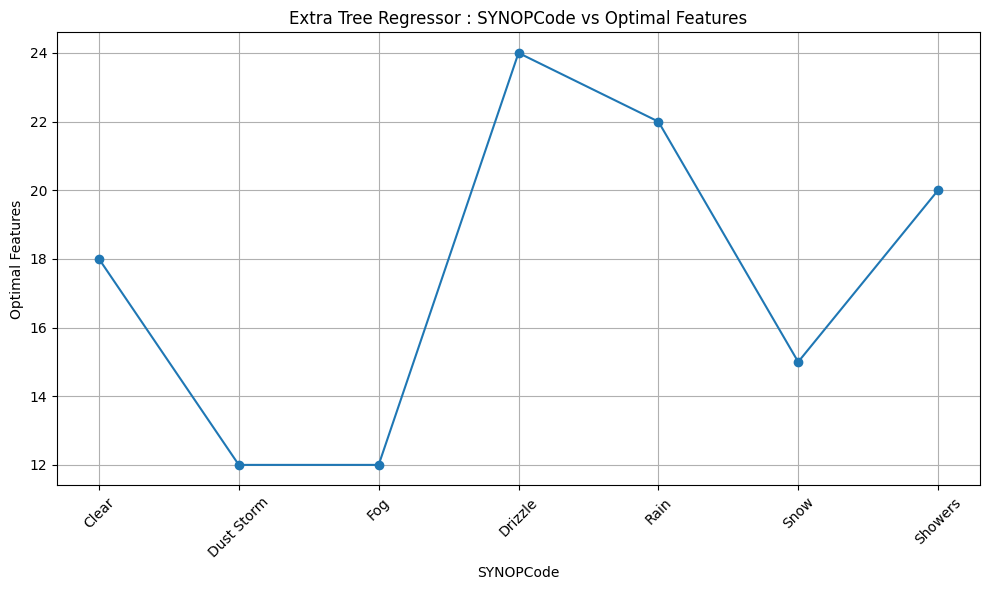

In [10]:
# Replace SYNOPCode with descriptions for plotting
comb_results_df2['Weather'] = comb_results_df2['SYNOPCode'].map(weather_descriptions)
# Plotting SYNOPCode vs Optimal_Features
plt.figure(figsize=(10, 6))
plt.plot(comb_results_df2['Weather'], comb_results_df2['Optimal_Features'], marker='o', linestyle='-')
plt.title('Extra Tree Regressor : SYNOPCode vs Optimal Features')
plt.xlabel('SYNOPCode')
plt.ylabel('Optimal Features')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

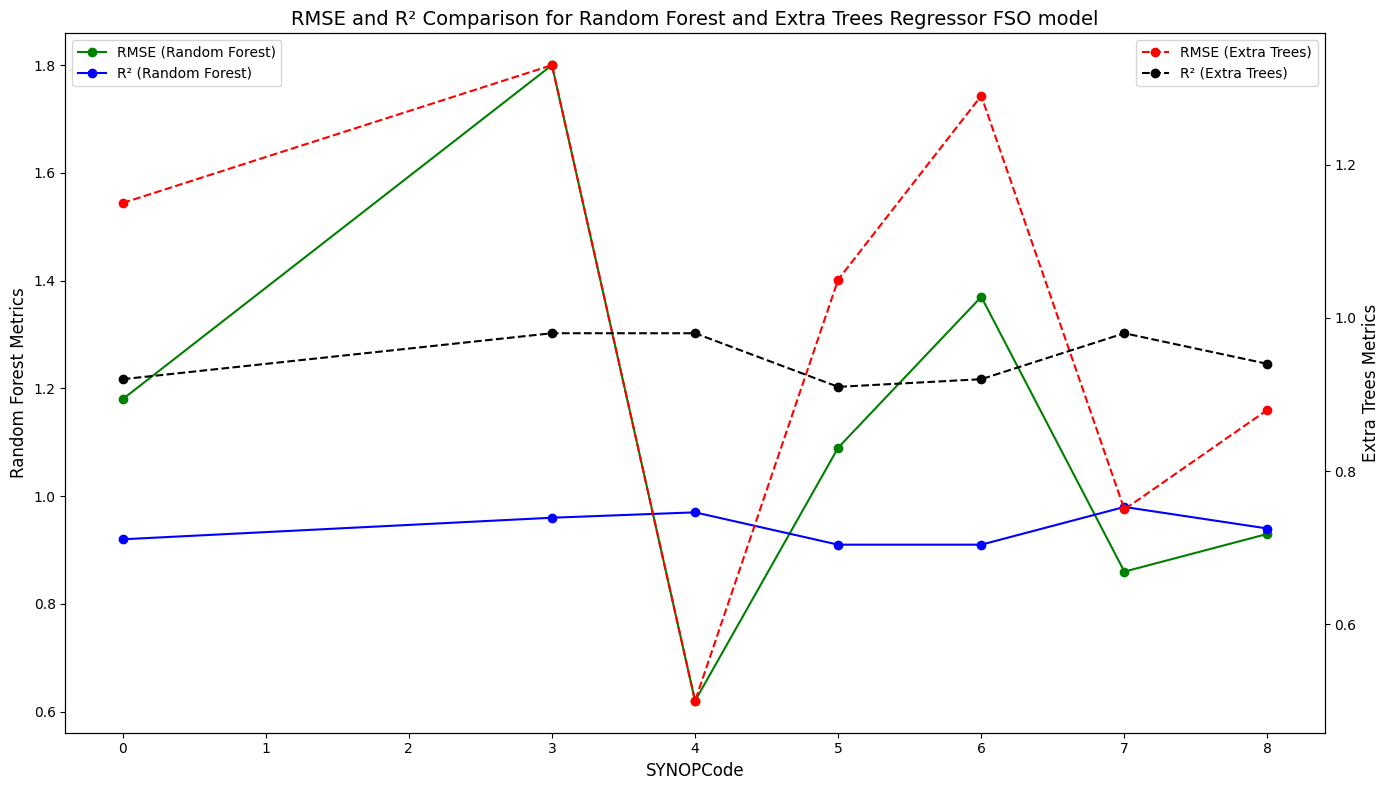

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot RMSE and R2 for Random Forest Regressor
ax1.plot(comb_results_df1['SYNOPCode'], comb_results_df1['Optimal_RMSE'],
         color='green', marker='o', label='RMSE (Random Forest)')
ax1.plot(comb_results_df1['SYNOPCode'], comb_results_df1['Optimal_R2'],
         color='blue', marker='o', label='R² (Random Forest)')
ax1.set_xlabel('SYNOPCode', fontsize=12)
ax1.set_ylabel('Random Forest Metrics', fontsize=12)
ax1.tick_params(axis='y')

# Create a second y-axis for Extra Trees metrics
ax2 = ax1.twinx()
ax2.plot(comb_results_df2['SYNOPCode'], comb_results_df2['Optimal_RMSE'],
         color='red', marker='o', linestyle='--', label='RMSE (Extra Trees)')
ax2.plot(comb_results_df2['SYNOPCode'], comb_results_df2['Optimal_R2'],
         color='black', marker='o', linestyle='--', label='R² (Extra Trees)')
ax2.set_ylabel('Extra Trees Metrics', fontsize=12)
ax2.tick_params(axis='y')

# Add title and legend
plt.title('RMSE and R² Comparison for Random Forest and Extra Trees Regressor FSO model', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to fit everything
plt.tight_layout()


The Group FSO_Att model with Extra Trees Regressor is the best Model